In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

# Model configuration
img_width, img_height = 28, 28
batch_size = 128
no_epochs = 10
no_classes = 10
validation_split = 0.2
verbosity = 0

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, 1)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = x_train / 255
x_test = x_test / 255

Using TensorFlow backend.


# Noise factor = 0.1

In [2]:
noise_factor = 0.1
x_train_noisy1 = x_train + np.random.randn(*x_train.shape) * noise_factor 
x_train_noisy1 = x_train_noisy1.clip(0.0, 1.0)
x_test_noisy1 = x_test + np.random.randn(*x_test.shape) * noise_factor 
x_test_noisy1 = x_test_noisy1.clip(0.0, 1.0)

In [3]:
# Create the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, kernel_size=(5, 5), activation='sigmoid',padding='same'))

# model.summary()

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_noisy1, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy1, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.2076 - accuracy: 0.7966 - val_loss: 0.1475 - val_accuracy: 0.8003
Epoch 2/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1380 - accuracy: 0.8042 - val_loss: 0.1296 - val_accuracy: 0.8067
Epoch 3/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1257 - accuracy: 0.8073 - val_loss: 0.1208 - val_accuracy: 0.8076
Epoch 4/10
60000/60000 [==============================] - 214s 4ms/step - loss: 0.1193 - accuracy: 0.8087 - val_loss: 0.1165 - val_accuracy: 0.8095
Epoch 5/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1149 - accuracy: 0.8096 - val_loss: 0.1119 - val_accuracy: 0.8085
Epoch 6/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1116 - accuracy: 0.8102 - val_loss: 0.1093 - val_accuracy: 0.8101
Epoch 7/10
60000/60000 [==============================] - 125s

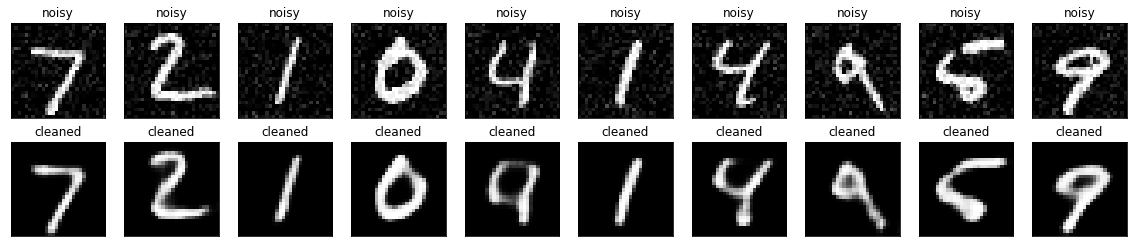

In [4]:
decoded1 = model.predict(x_test_noisy1)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #noisy images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy1[i].reshape(28, 28))
    plt.gray()
    ax.set_title('noisy')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #original images
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded1[i].reshape(28, 28))
    plt.gray()
    ax.set_title('cleaned')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
# # Generate reconstructions
# num_reconstructions = 8
# samples = x_test[:num_reconstructions]
# targets = y_test[:num_reconstructions]
# reconstructions = model.predict(samples)

# # Plot reconstructions
# for i in np.arange(0, num_reconstructions):
#   # Get the sample and the reconstruction
#   sample = samples[i][:, :, 0]
#   reconstruction = reconstructions[i][:, :, 0]
#   input_class = targets[i]
#   # Matplotlib preparations
#   fig, axes = plt.subplots(1, 2)
#   # Plot sample and reconstruciton
#   axes[0].imshow(sample)
#   axes[0].set_title('Original image')
#   axes[1].imshow(reconstruction)
#   axes[1].set_title('Reconstruction with UpSampling2D')
#   fig.suptitle(f'MNIST target = {input_class}')
#   plt.show()

# Noise factor = 0.5

In [6]:
noise_factor = 0.5
x_train_noisy2 = x_train + np.random.randn(*x_train.shape) * noise_factor 
x_train_noisy2 = x_train_noisy2.clip(0.0, 1.0) 
x_test_noisy2 = x_test + np.random.randn(*x_test.shape) * noise_factor 
x_test_noisy2 = x_test_noisy2.clip(0.0, 1.0)

In [7]:
# Create the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, kernel_size=(5, 5), activation='sigmoid',padding='same'))

model.summary()

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_noisy2, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy2, x_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)          

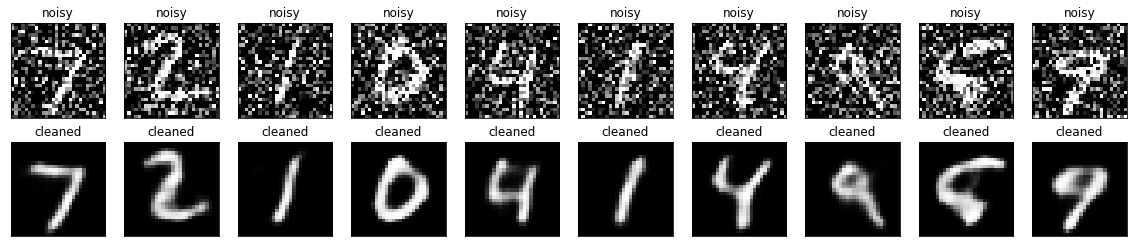

In [8]:
decoded2 = model.predict(x_test_noisy2)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #noisy images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy2[i].reshape(28, 28))
    plt.gray()
    ax.set_title('noisy')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #original images
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded2[i].reshape(28, 28))
    plt.gray()
    ax.set_title('cleaned')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Noise factor = 1.0

In [9]:
noise_factor = 1.0
x_train_noisy3 = x_train + np.random.randn(*x_train.shape) * noise_factor 
x_train_noisy3 = x_train_noisy3.clip(0.0, 1.0) 
x_test_noisy3 = x_test + np.random.randn(*x_test.shape) * noise_factor 
x_test_noisy3 = x_test_noisy3.clip(0.0, 1.0)

In [10]:
# Create the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, kernel_size=(5, 5), activation='sigmoid',padding='same'))

model.summary()

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_noisy3, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy3, x_test))
decoded3 = model.predict(x_test_noisy3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 8)          

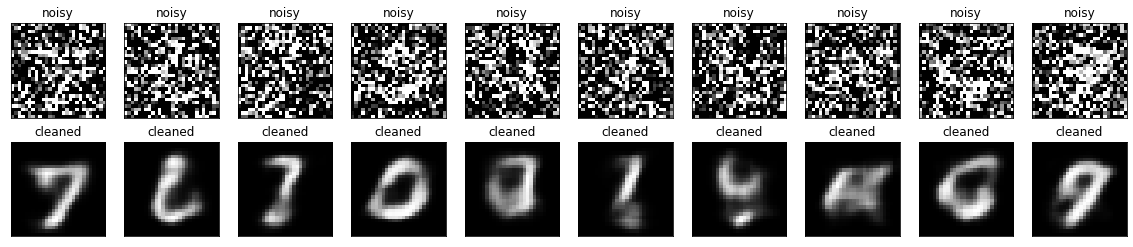

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #noisy images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy3[i].reshape(28, 28))
    plt.gray()
    ax.set_title('noisy')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #original images
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded3[i].reshape(28, 28))
    plt.gray()
    ax.set_title('cleaned')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
# In all three figures, we added different noise factors and passed the noisy images to autoencoders to cancel the noise.
# The more the noise factor the more difficult is to get the cleaned images from autoencoders with the same model.
# As we can see, noise factor 0.1 gives the most clear output image and noise factor 1.0 gives the most blurred output images.
# By using a different model we might get good accuracy and clear image with a noise factor 1.0.